# Лабораторијска вежба - СИВС8
## Поставка

Човек има 4 кључа од којих само један отвара браву. Он проба насумице један по један кључ, склањајући кључеве које је већ пробао, све док не отвори браву. Нека је $A_k$ догађај да је брава отворена у $k$-том покушају. Написати програм који симулира описани експеримент и понавља симулацију $n$ пута ($n$ задаје корисник). Програм на излазу приказује релативне фреквенције догађаја $A_1, A_2, A_3, A_4$. Приказати резултате за неколико вредности $n$ и  упоредити резултате симулације са израчунатим вероватноћама догађаја $A_1, A_2, A_3, A_4$.

## Аналитичко решење

Човек бира један од четири кључа. Вероватноћа да је један од кључева добар је у овом случају $\frac{1}{4}$, тако да имамо да је $P(A_1) = \frac{1}{4}$. Уколико није добар, остало нам је још три кључа и између њих можемо да изаберемо онај добар са вероватноћом $\frac{1}{3}$, што значи да је $P(A_2) = \frac{3}{4} \cdot \frac{1}{3} = \frac{1}{4}$. Даље добијамо да се са вероватноћом $\frac{1}{2}$ можемо одлучити за један од два преостала кључа, тако да је $P(A_3) = P(A_4) = \frac{3}{4} \cdot \frac{2}{3} \cdot \frac{1}{2} = \frac{1}{4}$, и добијамо да су вероватноће свих исхода једнаке.

Овај проблем можемо генерализовати на $n$ кључева. Вероватноћа догађаја $P(A_k)$ где је $k$ број покушаја у овом случају би била $P(A_k) =$$ \frac{1}{n-k+1} P(\overline{A_{k-1}}) =$$ \frac{1}{n-k+1} (1 - \frac{1}{n-k+2} P(\overline{A_{k-2}})) =$$ \frac{1}{n-k+1} \frac{n-k+1}{n-k+2} P(\overline{A_{k-2}}) =$$ ... = \frac{1}{n}$.

## Нумеричко решење

Решење испод покреће нумеричку симулацију са задатим бројем итерација и бројем врата од 4, и затим редом враћа колико пута су се током симулације десили догађаји $A_1$, $A_2$, $A_3$ и $A_4$.

In [20]:
from random import choice, randrange

def round(num_doors=4):
    correct_key = randrange(num_doors)
    choices = list(range(num_doors))
    for attempt in range(num_doors):
        chosen_key = choice(choices)
        choices.remove(chosen_key)
        if chosen_key == correct_key:
            return attempt

def simulation(n=100, num_doors=4):
    counts = [0 for _ in range(num_doors)]
    for round_number in range(n):
        counts[round(num_doors)] += 1
    return counts

simulation(int(input("Unesite n: ")))

Unesite n: 1000000


[250390, 249193, 250273, 250144]

### Визуелизација
Решење испод визуелизује расподеле догађаја $A_1$, $A_2$, $A_3$ и $A_4$ за одређене вредности $n$. Могуће је променити `num_doors` променљиву како би се променио број врата у симулацији. **Обавезно покренути ћелију изнад како би визуелизација радила!**

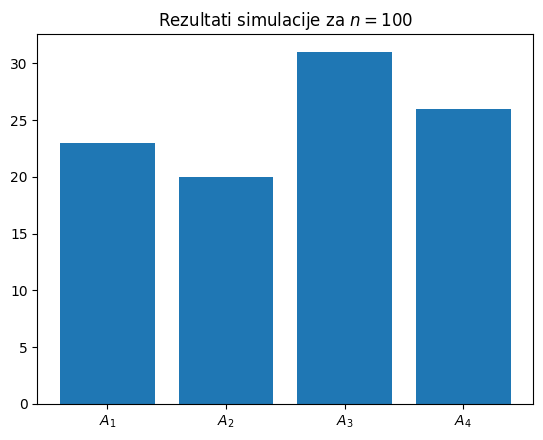

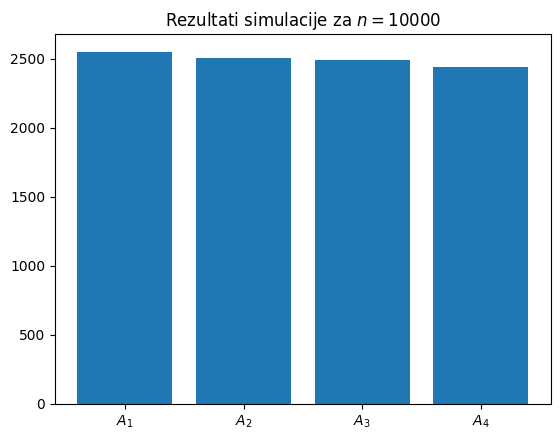

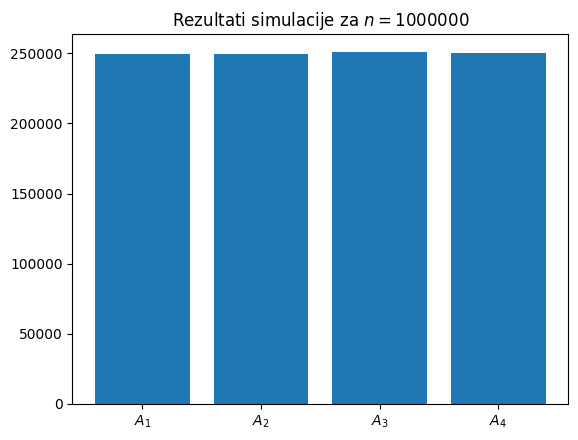

In [23]:
from matplotlib import pyplot as plt

n_choices = [100, 10000, 1000000]
num_doors = 4

for n in n_choices:
    results = simulation(n, num_doors)
    plt.figure()
    plt.bar(list(range(1, len(results) + 1)), results, tick_label=[f'$A_{{{i + 1}}}$' for i in range(len(results))])
    plt.title(f'Rezultati simulacije za $n = {n}$')
    plt.show()